In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import  LabelEncoder

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier


In [28]:
file_name = "diabetes_prediction_dataset.csv"
df = pd.read_csv(file_name)

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
#Dimension de la dataSet
df.shape

(100000, 9)

In [5]:
# La taille de notre dataSet
df.size

900000

In [8]:
# Afficher les columns names
df.columns.tolist()

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [11]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [12]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [15]:
# Trouver les null
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [17]:
#Information sur DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [21]:
#Calculer le nombre de doublons
df.duplicated().sum()

3854

In [22]:
#Supprimer les doublons
df = df.drop_duplicates()
df.shape

(96146, 9)

In [32]:
#style de Seaborn
sns.set(style="whitegrid")

#Récuperer les colonnes numériques
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [33]:
numerical_features

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

Visualisation des données numériques

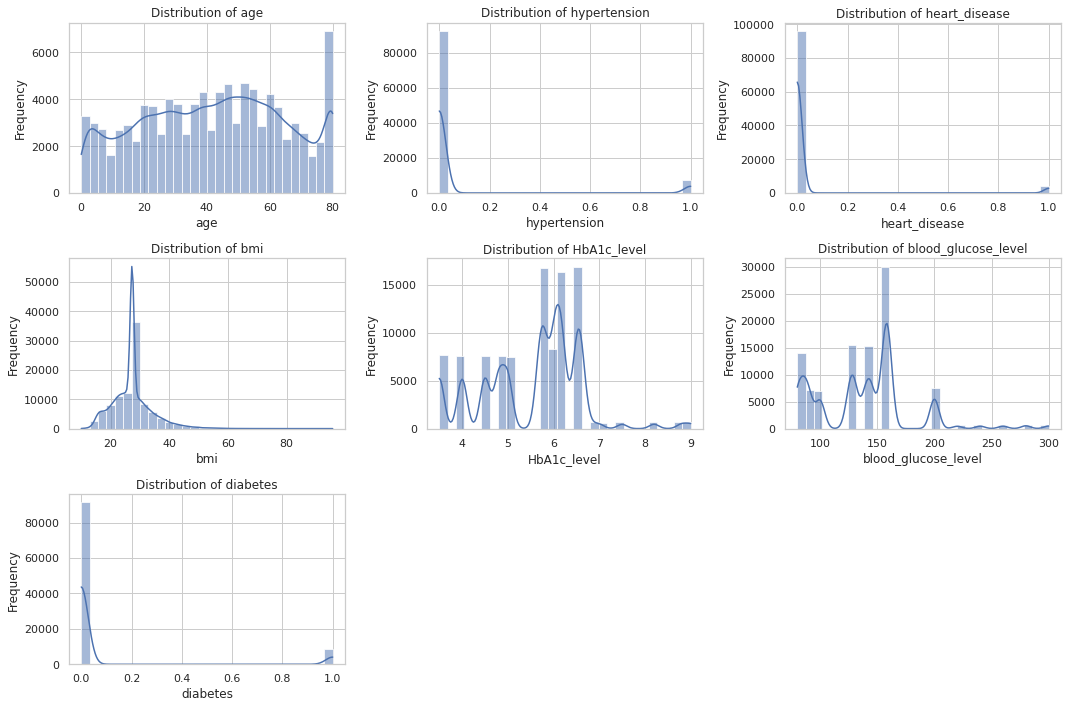

In [47]:
plt.figure(figsize=(15, 10))
for index, feature in enumerate(numerical_features,1):
    plt.subplot(3,3,index)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
    

Visualisation des données non numériques

In [49]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features

['gender', 'smoking_history']

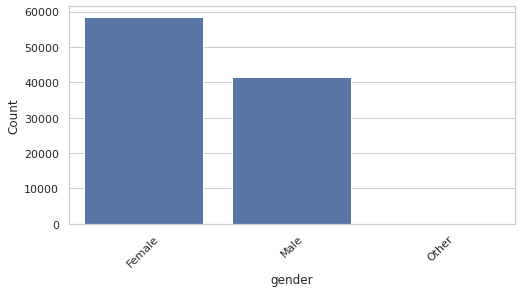

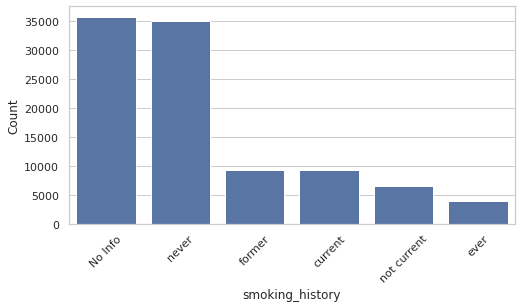

In [58]:
#plt.figure(figsize=(15, 5))
for feature in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Visualisation la distribution de diabetes

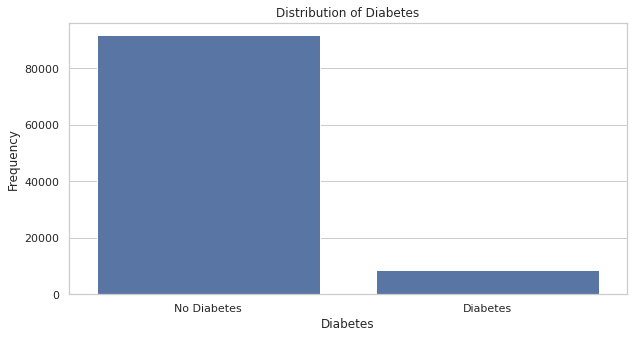

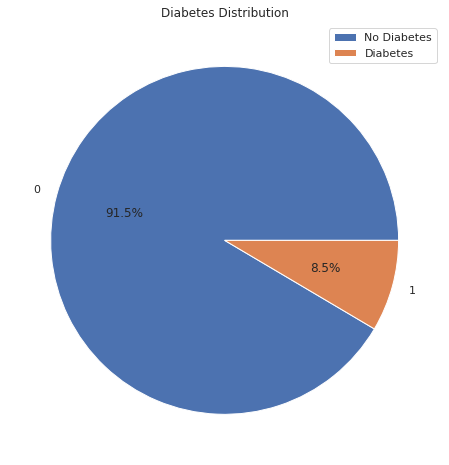

In [75]:
#countplot
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='diabetes', order=df["diabetes"].value_counts().index)
plt.title('Distribution of Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

#pie chart
diabetes_counts = df["diabetes"].value_counts()

plt.figure(figsize=(8,8))
plt.pie(diabetes_counts, labels = diabetes_counts.index, autopct='%1.1f%%')
plt.title('Diabetes Distribution')
plt.legend(['No Diabetes', 'Diabetes'])
plt.show()



Équilibrer notre dataSet

In [80]:
#Separer les 2 classes
majority_class = df[df['diabetes'] == 0]
minority_class = df[df['diabetes'] == 1]

In [81]:
majority_class_undersampled = majority_class.sample(n=8000, random_state = 42)

# combine les 2 dfs
balanced_df = pd.concat([majority_class_undersampled, minority_class], axis=0)

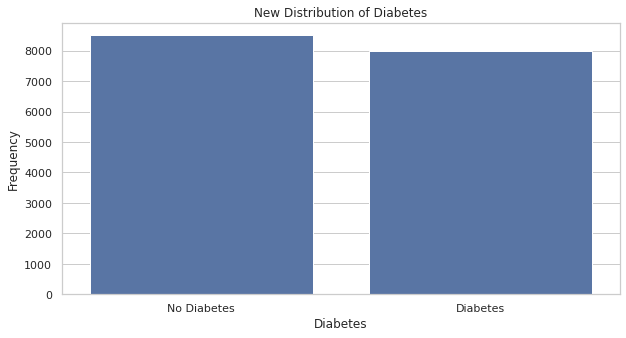

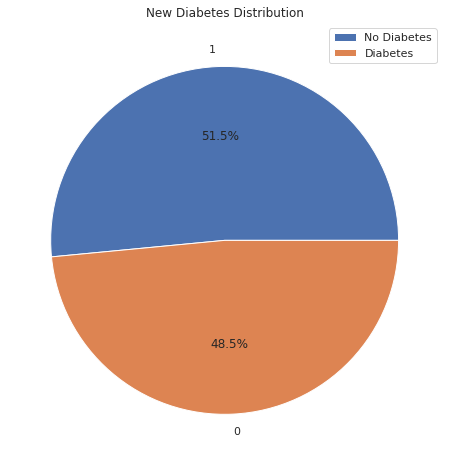

In [86]:
#countplot
plt.figure(figsize=(10,5))
sns.countplot(data=balanced_df, x='diabetes', order=balanced_df["diabetes"].value_counts().index)
plt.title('New Distribution of Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

#pie chart
diabetes_counts = balanced_df["diabetes"].value_counts()

plt.figure(figsize=(8,8))
plt.pie(diabetes_counts, labels = diabetes_counts.index, autopct='%1.1f%%')
plt.title('New Diabetes Distribution')
plt.legend(['No Diabetes', 'Diabetes'])
plt.show()

In [87]:
# One-hot encoding
encoded_df = pd.get_dummies(balanced_df, columns=['gender', 'smoking_history'])
encoded_df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
21737,35.0,0,0,27.32,3.5,200,0,1,0,0,1,0,0,0,0,0
62807,66.0,0,0,27.32,4.5,145,0,0,1,0,1,0,0,0,0,0
38693,32.0,0,0,32.71,6.6,90,0,0,1,0,0,0,0,0,1,0
72875,46.0,0,0,32.78,4.0,80,0,0,1,0,1,0,0,0,0,0
14817,22.0,0,0,23.51,4.5,158,0,1,0,0,0,0,0,0,1,0


In [94]:
#Définir les features et target
X = encoded_df.drop('diabetes', axis=1)
y = encoded_df['diabetes']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)
X_train.shape,X_test.shape,X.shape

((13200, 15), (3300, 15), (16500, 15))

Logistic Regression

In [97]:
lr=LogisticRegression(max_iter=3000)

lr.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [100]:
y_predection = lr.predict(X_test)

In [101]:
lr_accuracy = accuracy_score(y_test, y_predection)

lr_conf_matrix = confusion_matrix(y_test, y_predection)

lr_classification_rep = classification_report(y_test, y_predection)

In [102]:
print(f'lr_Accuracy: {lr_accuracy:.2f}')

print('\nlr_Confusion Matrix:')

print(lr_conf_matrix)

print('\nlr_Classification Report:')

print(lr_classification_rep)

lr_Accuracy: 0.88

lr_Confusion Matrix:
[[1368  212]
 [ 184 1536]]

lr_Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1580
           1       0.88      0.89      0.89      1720

    accuracy                           0.88      3300
   macro avg       0.88      0.88      0.88      3300
weighted avg       0.88      0.88      0.88      3300



In [103]:
#Checking for the over and under fiting

print("Training Score:",lr.score(X_train,y_train)*100,'%')

print("Testing Score:",lr.score(X_test,y_test)*100,'%')

Training Score: 88.87121212121212 %
Testing Score: 88.0 %


SVM Model

In [104]:
svm = SVC(kernel = 'linear', random_state = 20)
svm.fit(X_train, y_train)
svm_y_predection=svm.predict(X_test)

In [105]:
svm_accuracy = accuracy_score(y_test, svm_y_predection)
svm_conf_matrix = confusion_matrix(y_test, svm_y_predection)
svm_classification_rep = classification_report(y_test, svm_y_predection)

In [106]:
print(f'svm_Accuracy: {svm_accuracy:.2f}')
print('\nsvm_Confusion Matrix:')
print(svm_conf_matrix)
print('\nsvm_Classification Report:')
print(svm_classification_rep)

svm_Accuracy: 0.88

svm_Confusion Matrix:
[[1366  214]
 [ 177 1543]]

svm_Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1580
           1       0.88      0.90      0.89      1720

    accuracy                           0.88      3300
   macro avg       0.88      0.88      0.88      3300
weighted avg       0.88      0.88      0.88      3300



In [107]:
print("Training Score:",svm.score(X_train,y_train)*100,'%')
print("Testing Score:",svm.score(X_test,y_test)*100,'%')

Training Score: 88.82575757575758 %
Testing Score: 88.15151515151514 %


RandomForest Model

In [108]:
# Define the parameter grid to search

param_grid_ = {

    'n_estimators': [10, 50, 300, 200],  # Number of trees in the forest

    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree

    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node

    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node

}

# Initialize the grid search model

random_forest_model = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_, cv=2, n_jobs=-1)

In [109]:
random_forest_model = RandomForestClassifier()

random_forest_model.fit(X_train,y_train)

RandomForestClassifier()

In [111]:
y_pred_rf=random_forest_model.predict(X_test)


In [112]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)

rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

rf_classification_rep = classification_report(y_test, y_pred_rf)

In [113]:
print(f'rf_Accuracy: {rf_accuracy:.3f}')

print('\nrf_Confusion Matrix:')

print(rf_conf_matrix)

print('\nrf_Classification Report:')

print(rf_classification_rep)

rf_Accuracy: 0.897

rf_Confusion Matrix:
[[1405  175]
 [ 165 1555]]

rf_Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1580
           1       0.90      0.90      0.90      1720

    accuracy                           0.90      3300
   macro avg       0.90      0.90      0.90      3300
weighted avg       0.90      0.90      0.90      3300



In [114]:
print("Training Score:",random_forest_model.score(X_train,y_train)*100,'%')

print("Testing Score:",random_forest_model.score(X_test,y_test)*100,'%')

Training Score: 99.89393939393939 %
Testing Score: 89.6969696969697 %


Making a Predictive System

In [137]:
input_data = (3, 80.0, 8, 1, 0, 25.19, 6.6, 140, 1, 1, 0, 0, 0, 0, 0)


# changing the input_data to numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = random_forest_model.predict(input_data_reshaped)

print(prediction)

if (prediction[0] == 0):

  print('The person is not diabetic')

else:

  print('The person is diabetic')

[0]
The person is not diabetic


/home/abdelmoumen/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
